<a href="https://colab.research.google.com/github/D-Sritha-D/MAGIC_Dataset_Analysis/blob/main/Magic_Dataset_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [28]:
# Find the unique elements in each column, basically, the number of classes.
df['class'].unique()

array(['g', 'h'], dtype=object)

In [29]:
df['class'] = (df['class'] == 'g').astype(int)

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [31]:
# Creating my test, validation and test dataset

split1 = int(0.6*len(df))
split2 = int(0.8*len(df))

train, valid, test = np.split(df.sample(frac=1), [split1, split2])

'''df.sample(frac=1): This randomly shuffles all the rows in the DataFrame df.
   frac=1 means that it's taking a fraction of 1, which is equivalent to using all the rows.
   This effectively randomizes the order of the rows in df.'''



"df.sample(frac=1): This randomly shuffles all the rows in the DataFrame df. \n   frac=1 means that it's taking a fraction of 1, which is equivalent to using all the rows. \n   This effectively randomizes the order of the rows in df."

In [32]:
'''If we observe the values of the data in the dataset, they range from 0.00 something to 1000.00 something.
   This kind of discrepancy will lead to problems with dealing with the data.
   Hence, we must scale the data accordingly.'''

from sklearn.preprocessing import StandardScaler

def scale_dataset(dataframe):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  data = np.hstack((X, np.reshape(y, (len(y), 1))))

  return data, X, y

In [33]:
print(len(train[train['class'] == 1]))
print(len(train[train['class'] == 0]))

''''So if we look at the data given, we have more samples for gamma, than we do for hedron.
    Hence, we must do something to ensure that both of them have a comparable number.
    This is where the concept of oversampling comes in as shown below'''

7421
3991


"'So if we look at the data given, we have more samples for gamma, than we do for hedron.\n    Hence, we must do something to ensure that both of them have a comparable number.\n    This is where the concept of oversampling comes in as shown below"

In [34]:
from imblearn.over_sampling import RandomOverSampler

def scale_dataset(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (len(y), 1))))
  return data, X, y

In [35]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

# Only training will have oversampling because it will be nice to train.
# When it comes to validation and testing, we want to keep it as real as possible.

# **Implementing KNN Classifier**

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [37]:
knn_model = KNeighborsClassifier(n_neighbors = 5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred = knn_model.predict(X_test)

In [39]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1329
           1       0.86      0.86      0.86      2475

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.81      0.82      0.82      3804



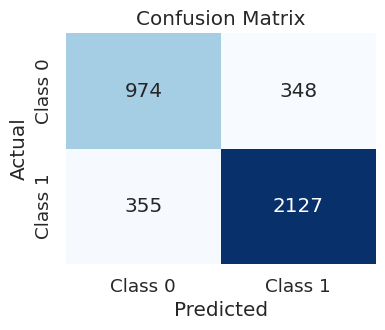

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## **Implementing Naive Bayes Classifier**

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [43]:
y_pred = nb_model.predict(X_test)

In [44]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.42      0.69      0.52       808
           1       0.90      0.74      0.81      2996

    accuracy                           0.73      3804
   macro avg       0.66      0.72      0.67      3804
weighted avg       0.80      0.73      0.75      3804



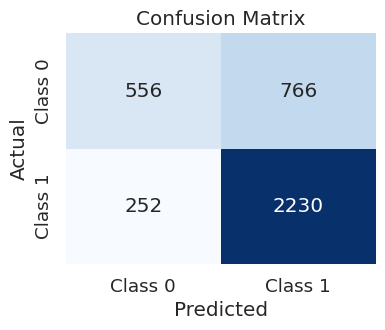

In [45]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Implementing Logistic Regression**

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train, y_train)

In [48]:
y_pred = lr_model.predict(X_test)

In [49]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1392
           1       0.83      0.85      0.84      2412

    accuracy                           0.79      3804
   macro avg       0.78      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



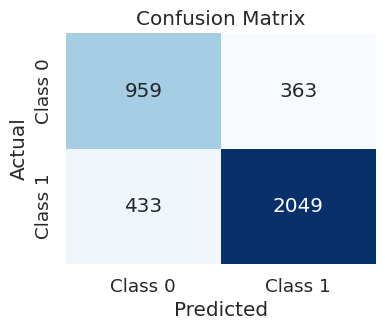

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Implementing Support Vector Machine**

In [51]:
from sklearn.svm import SVC

In [52]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [53]:
y_pred = svm_model.predict(X_test)

In [54]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      1265
           1       0.91      0.89      0.90      2539

    accuracy                           0.87      3804
   macro avg       0.85      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804



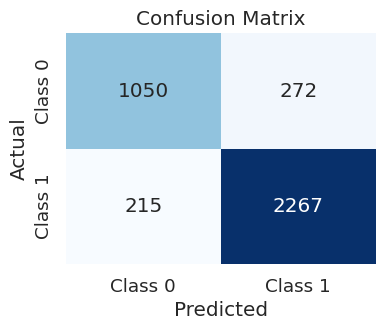

In [55]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Implementing a Neural Network**

In [56]:
import tensorflow as tf

In [68]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [69]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
  # Dropout is a layer which is used to prevent overfitting. For every epoch, the dropout layer
  # will exclude some neurons from being trained based on some probablity that we pass.
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


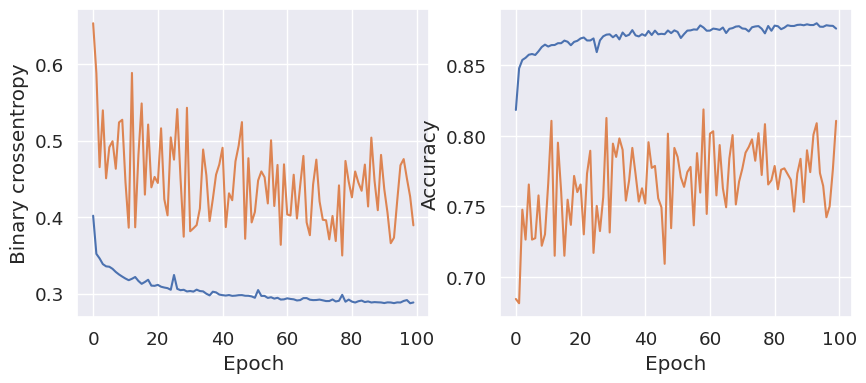

119/119 [==============================] - 0s 1ms/step - loss: 0.3132 - accuracy: 0.8754
16 nodes, dropout 0, lr 0.01, batch size 64


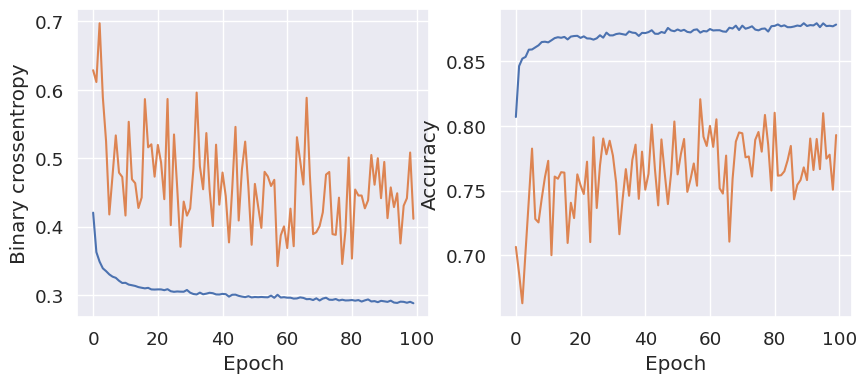

119/119 [==============================] - 0s 2ms/step - loss: 0.3188 - accuracy: 0.8707
16 nodes, dropout 0, lr 0.01, batch size 128


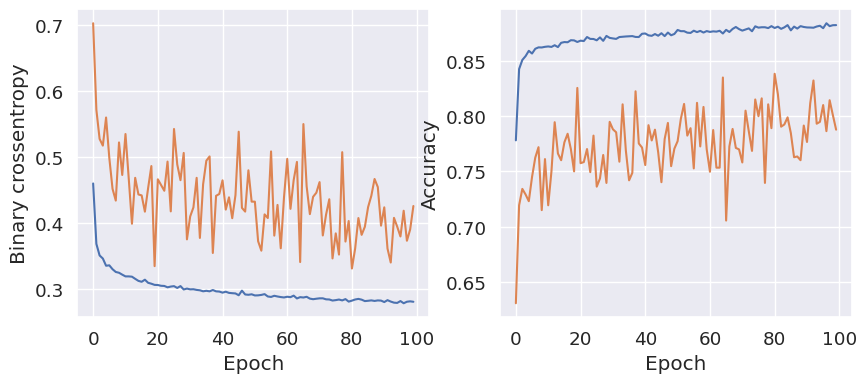

119/119 [==============================] - 0s 1ms/step - loss: 0.3121 - accuracy: 0.8691
16 nodes, dropout 0, lr 0.005, batch size 32


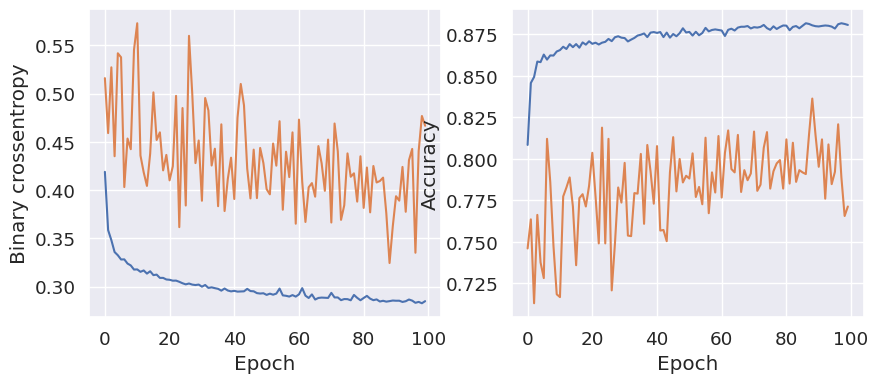

119/119 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.8767
16 nodes, dropout 0, lr 0.005, batch size 64


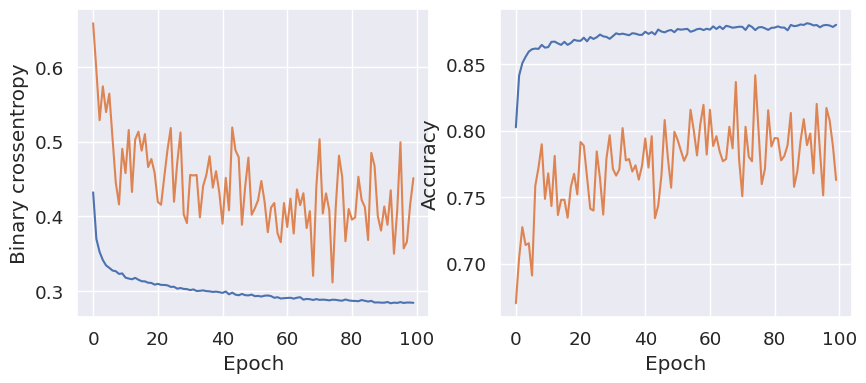

119/119 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.8704
16 nodes, dropout 0, lr 0.005, batch size 128


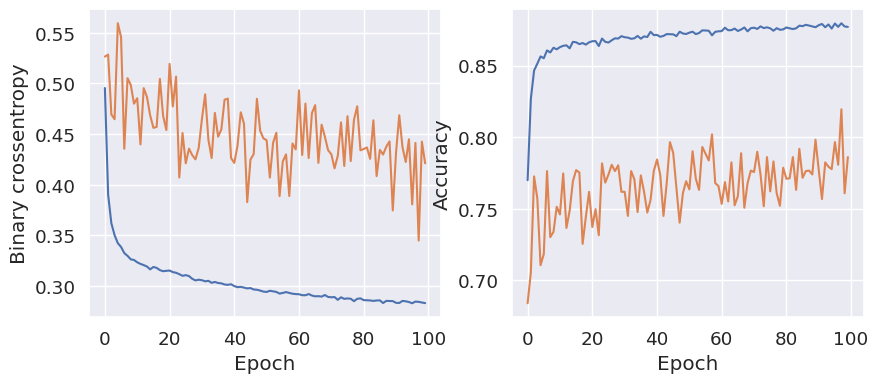

119/119 [==============================] - 0s 1ms/step - loss: 0.3131 - accuracy: 0.8717
16 nodes, dropout 0, lr 0.001, batch size 32


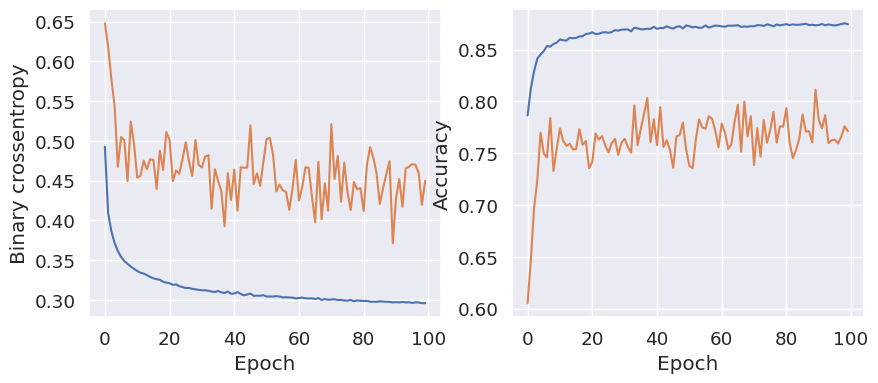

119/119 [==============================] - 0s 1ms/step - loss: 0.3029 - accuracy: 0.8733
16 nodes, dropout 0, lr 0.001, batch size 64


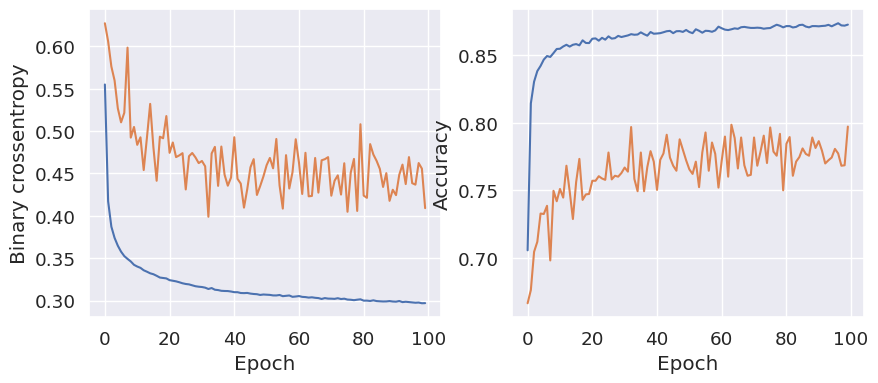

119/119 [==============================] - 0s 1ms/step - loss: 0.3054 - accuracy: 0.8733
16 nodes, dropout 0, lr 0.001, batch size 128


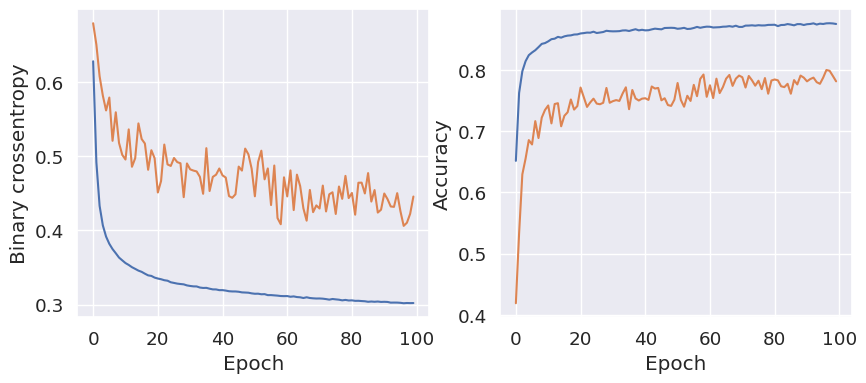

119/119 [==============================] - 0s 1ms/step - loss: 0.2985 - accuracy: 0.8757
16 nodes, dropout 0.2, lr 0.01, batch size 32


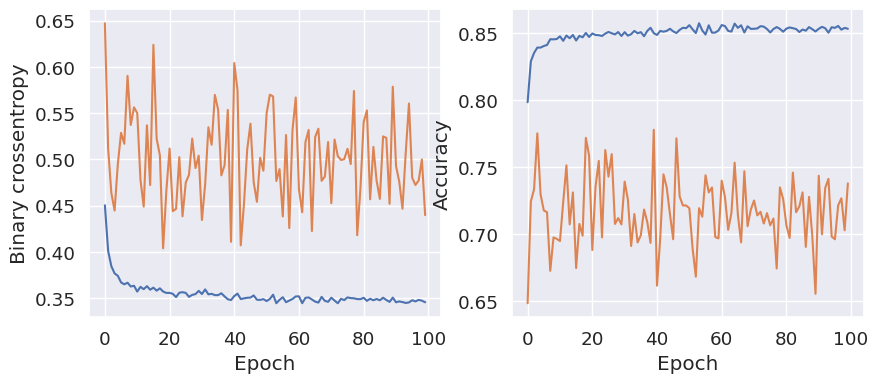

119/119 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.8686
16 nodes, dropout 0.2, lr 0.01, batch size 64


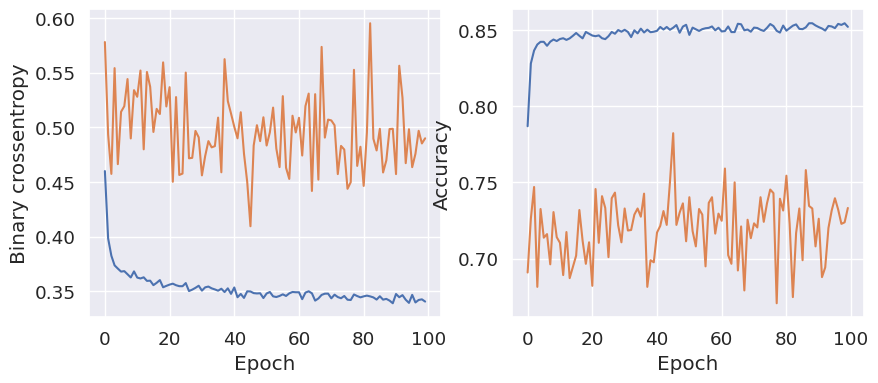

119/119 [==============================] - 0s 1ms/step - loss: 0.3134 - accuracy: 0.8678
16 nodes, dropout 0.2, lr 0.01, batch size 128


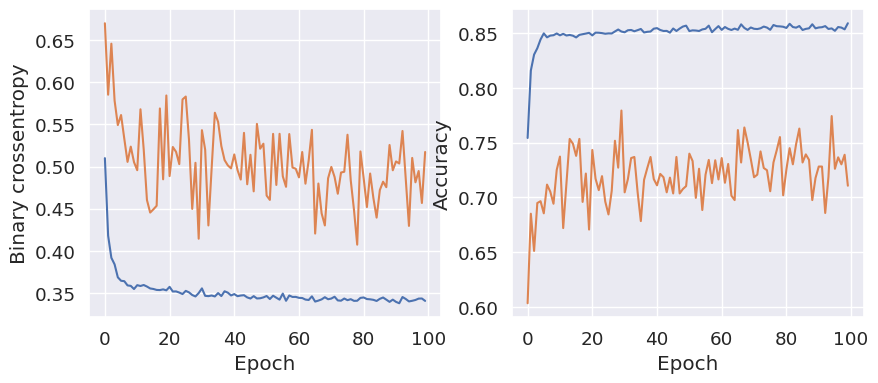

119/119 [==============================] - 0s 1ms/step - loss: 0.3164 - accuracy: 0.8644
16 nodes, dropout 0.2, lr 0.005, batch size 32


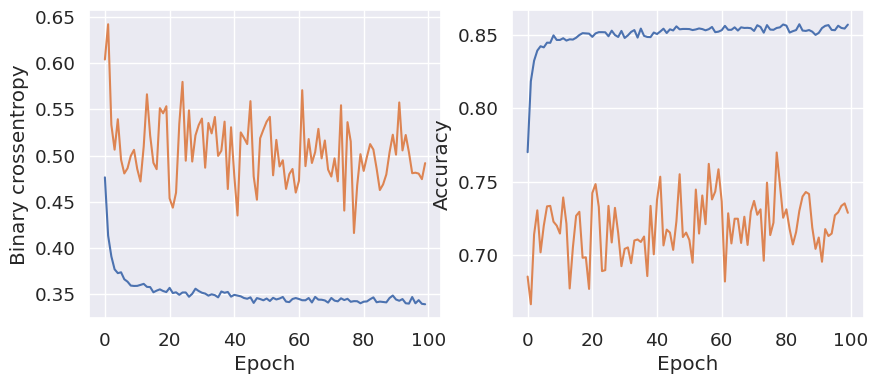

119/119 [==============================] - 0s 1ms/step - loss: 0.3102 - accuracy: 0.8715
16 nodes, dropout 0.2, lr 0.005, batch size 64


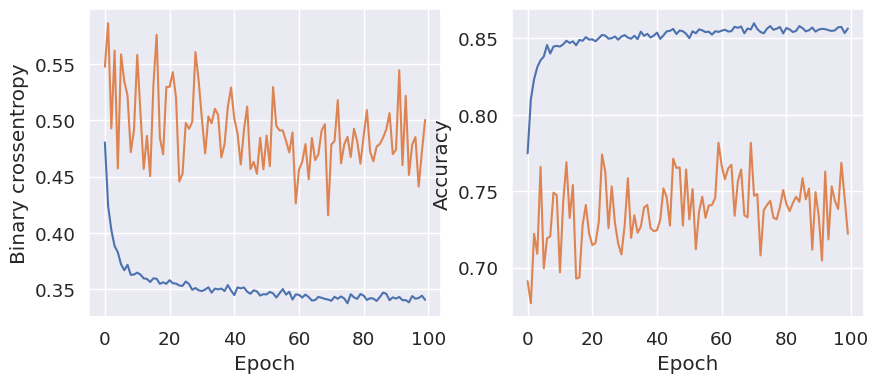

119/119 [==============================] - 0s 1ms/step - loss: 0.3140 - accuracy: 0.8662
16 nodes, dropout 0.2, lr 0.005, batch size 128


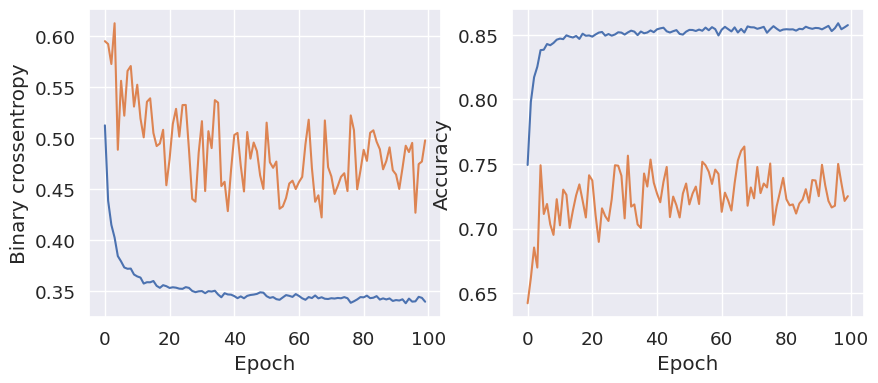

119/119 [==============================] - 0s 1ms/step - loss: 0.3134 - accuracy: 0.8670
16 nodes, dropout 0.2, lr 0.001, batch size 32


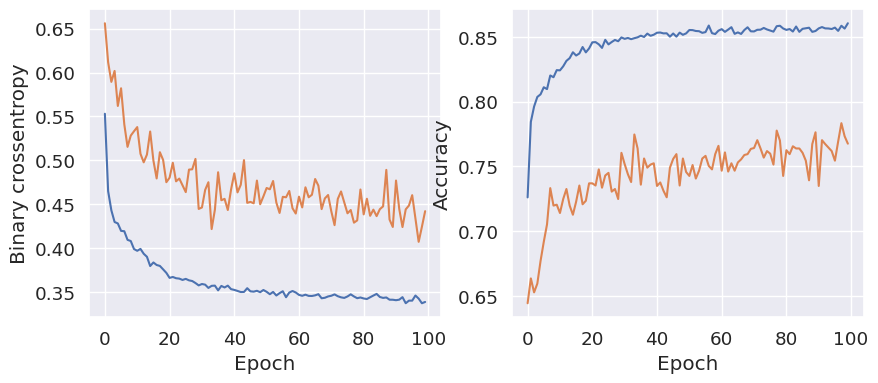

119/119 [==============================] - 0s 1ms/step - loss: 0.3076 - accuracy: 0.8675
16 nodes, dropout 0.2, lr 0.001, batch size 64


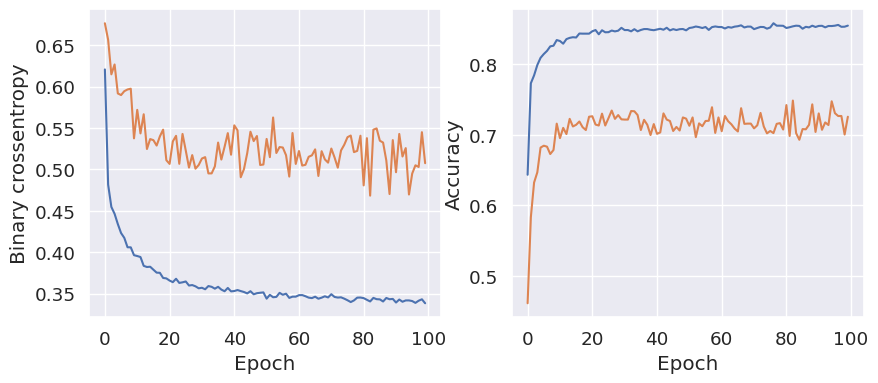

119/119 [==============================] - 0s 1ms/step - loss: 0.3076 - accuracy: 0.8680
16 nodes, dropout 0.2, lr 0.001, batch size 128


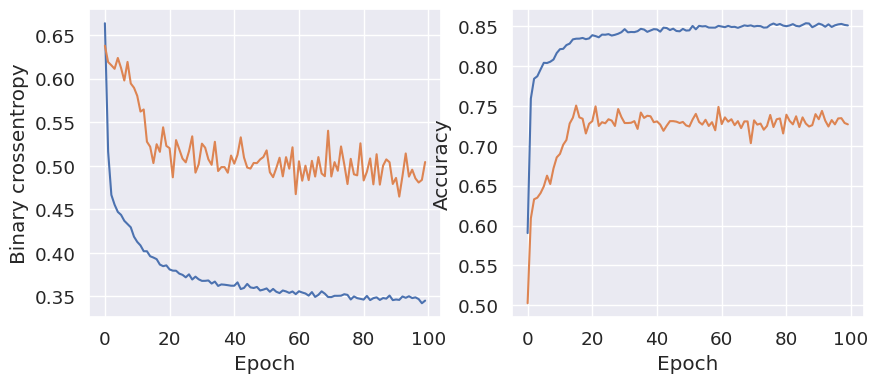

119/119 [==============================] - 0s 1ms/step - loss: 0.3159 - accuracy: 0.8659
32 nodes, dropout 0, lr 0.01, batch size 32


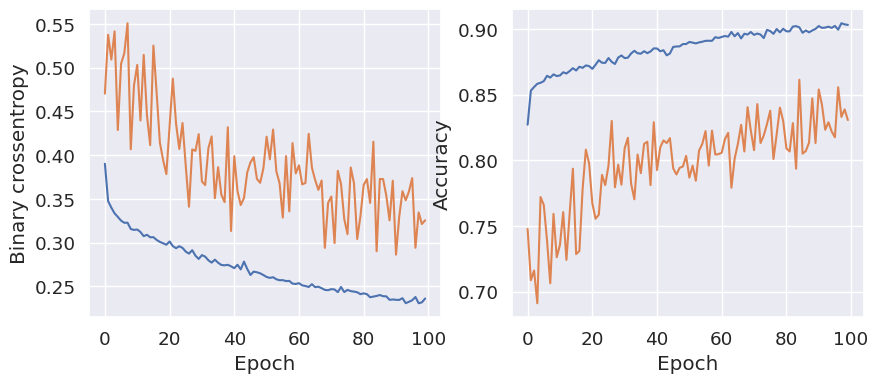

119/119 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8601
32 nodes, dropout 0, lr 0.01, batch size 64


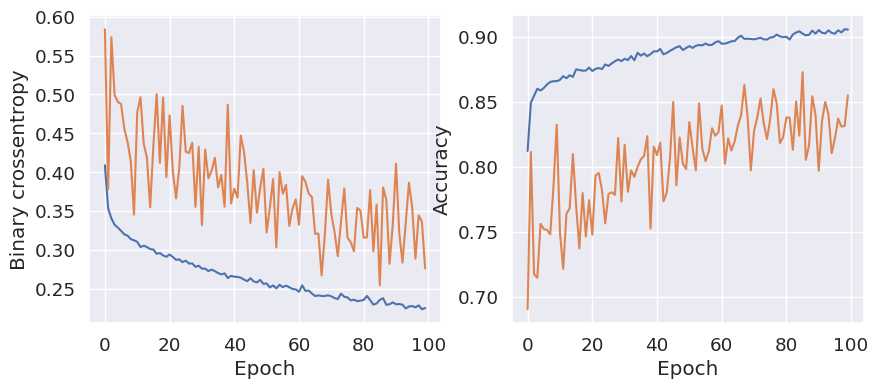

119/119 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8678
32 nodes, dropout 0, lr 0.01, batch size 128


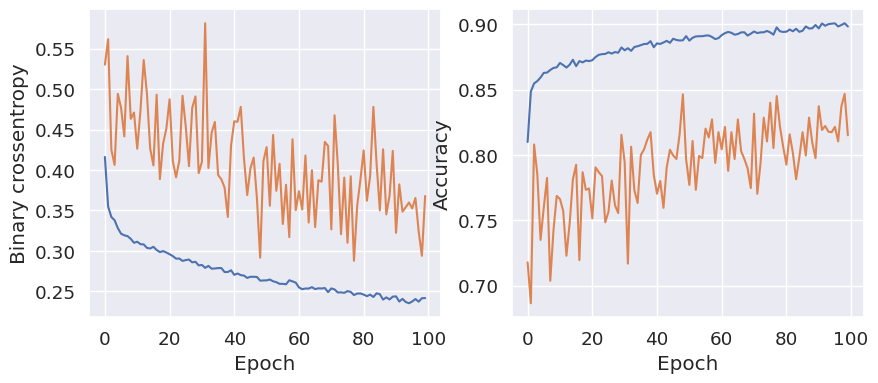

119/119 [==============================] - 0s 1ms/step - loss: 0.3585 - accuracy: 0.8683
32 nodes, dropout 0, lr 0.005, batch size 32


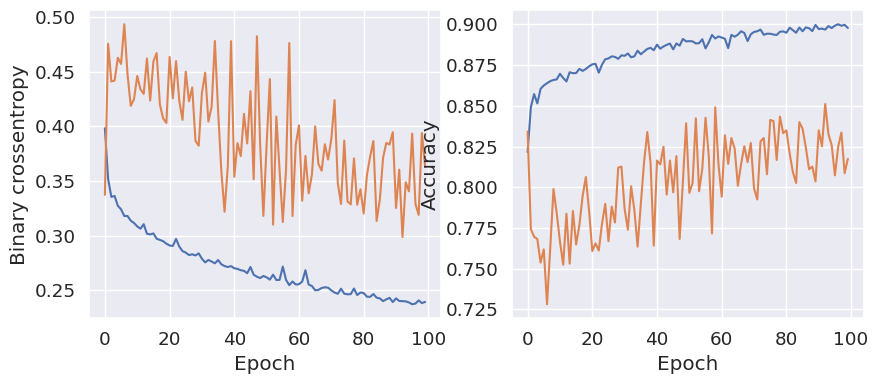

119/119 [==============================] - 0s 1ms/step - loss: 0.3732 - accuracy: 0.8654
32 nodes, dropout 0, lr 0.005, batch size 64


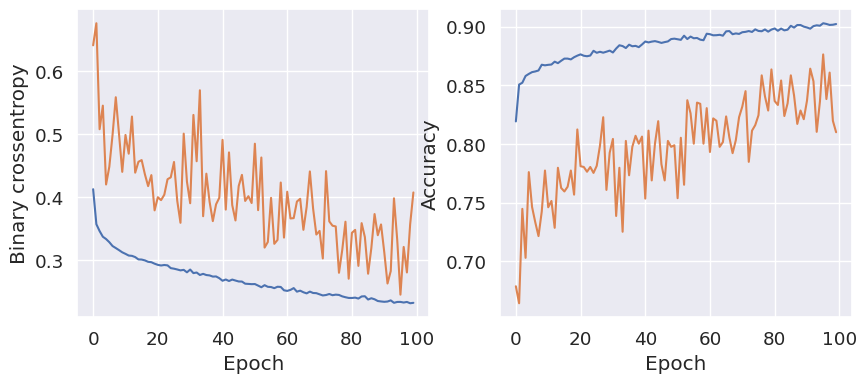

119/119 [==============================] - 0s 1ms/step - loss: 0.3889 - accuracy: 0.8667
32 nodes, dropout 0, lr 0.005, batch size 128


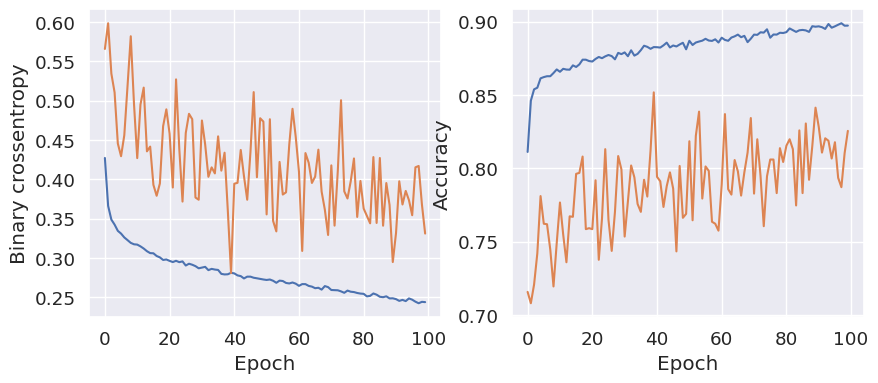

119/119 [==============================] - 0s 2ms/step - loss: 0.3431 - accuracy: 0.8725
32 nodes, dropout 0, lr 0.001, batch size 32


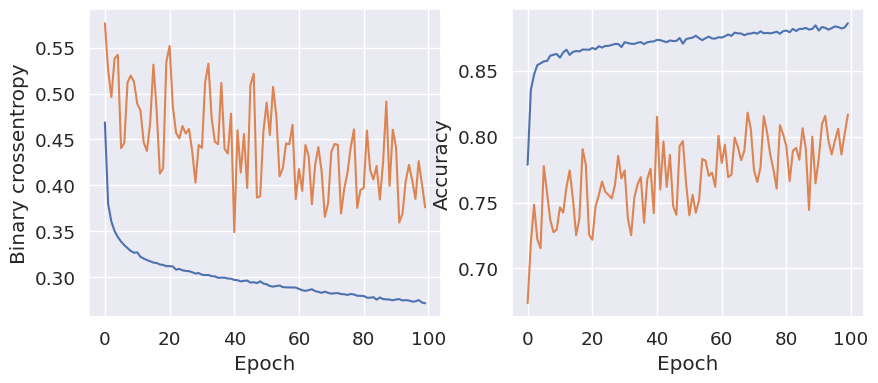

119/119 [==============================] - 0s 2ms/step - loss: 0.3121 - accuracy: 0.8712
32 nodes, dropout 0, lr 0.001, batch size 64


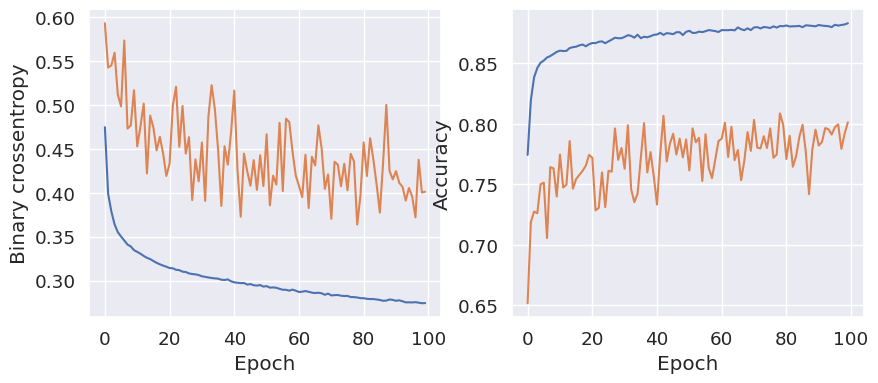

119/119 [==============================] - 0s 1ms/step - loss: 0.3017 - accuracy: 0.8746
32 nodes, dropout 0, lr 0.001, batch size 128


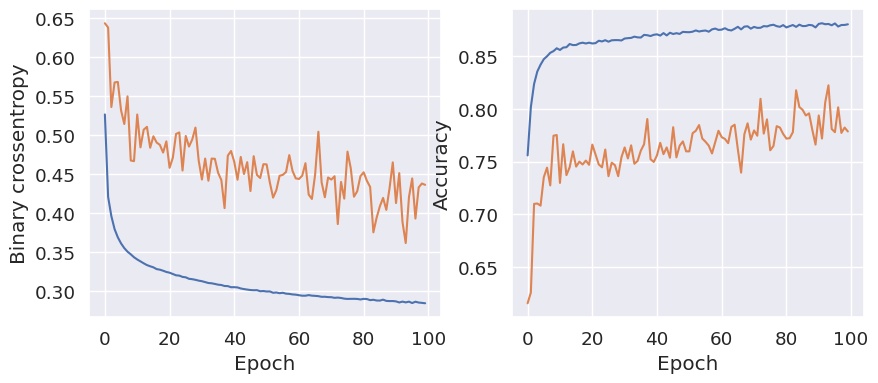

119/119 [==============================] - 0s 1ms/step - loss: 0.3010 - accuracy: 0.8736
32 nodes, dropout 0.2, lr 0.01, batch size 32


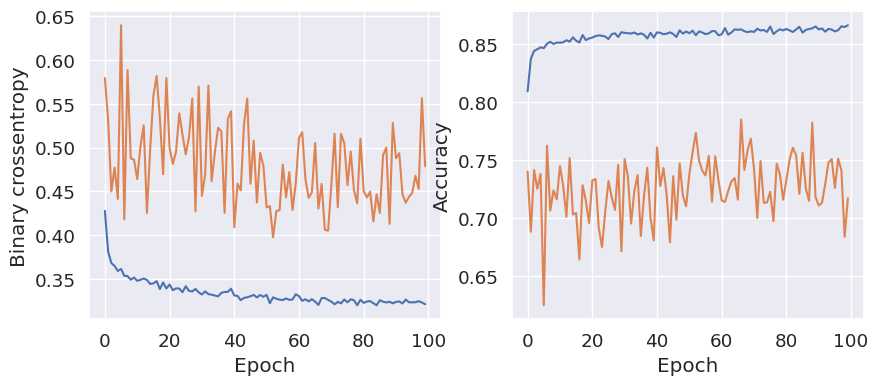

119/119 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8675
32 nodes, dropout 0.2, lr 0.01, batch size 64


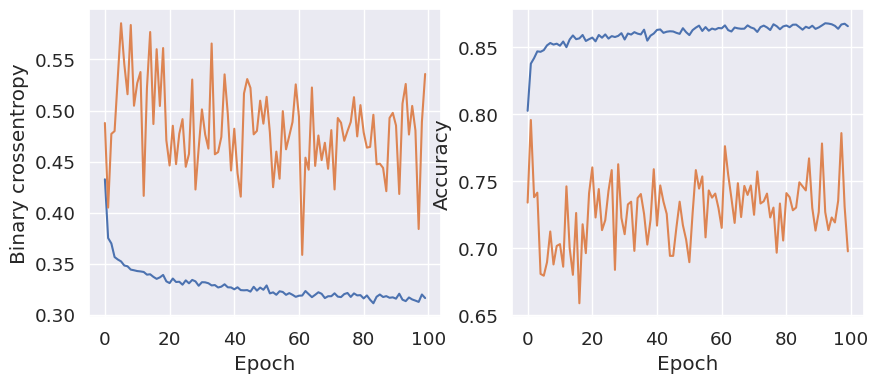

119/119 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8654
32 nodes, dropout 0.2, lr 0.01, batch size 128


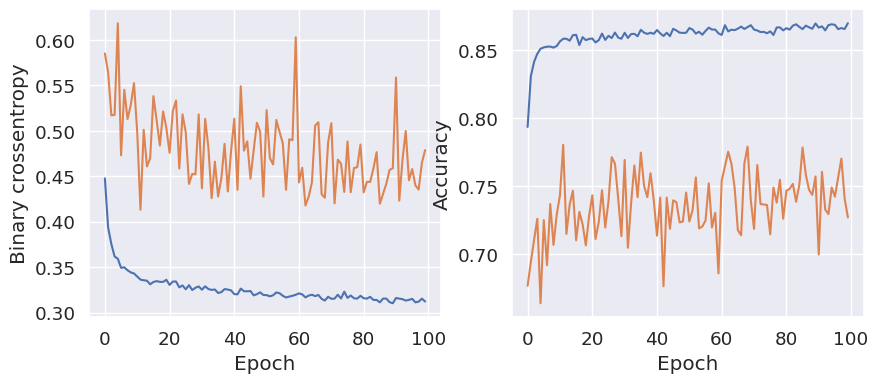

119/119 [==============================] - 0s 1ms/step - loss: 0.3048 - accuracy: 0.8701
32 nodes, dropout 0.2, lr 0.005, batch size 32


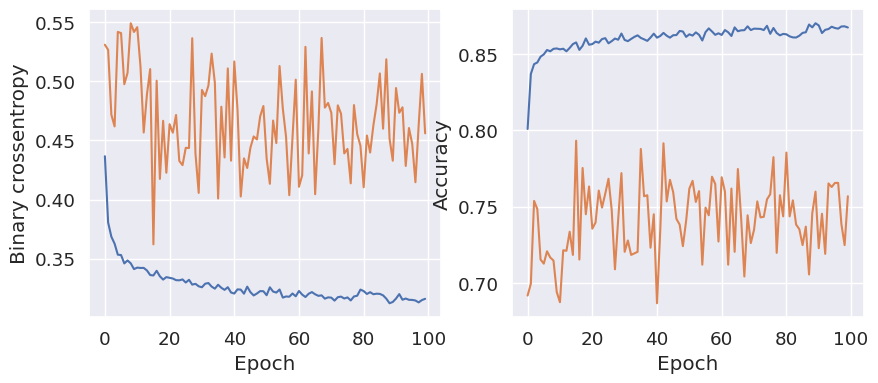

119/119 [==============================] - 0s 2ms/step - loss: 0.3027 - accuracy: 0.8778
32 nodes, dropout 0.2, lr 0.005, batch size 64


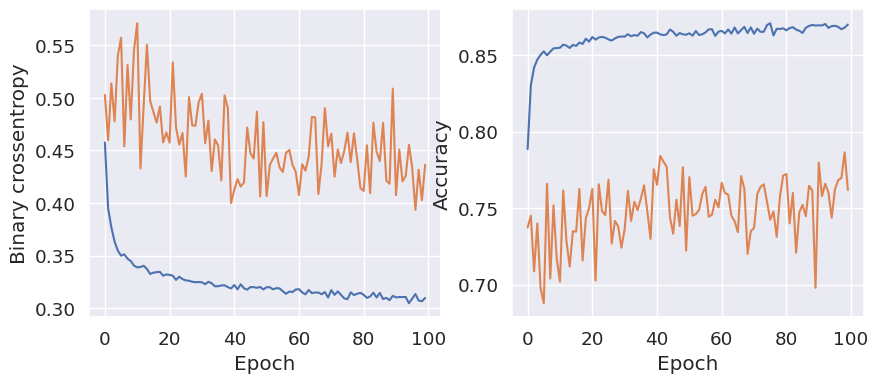

119/119 [==============================] - 0s 1ms/step - loss: 0.2957 - accuracy: 0.8764
32 nodes, dropout 0.2, lr 0.005, batch size 128


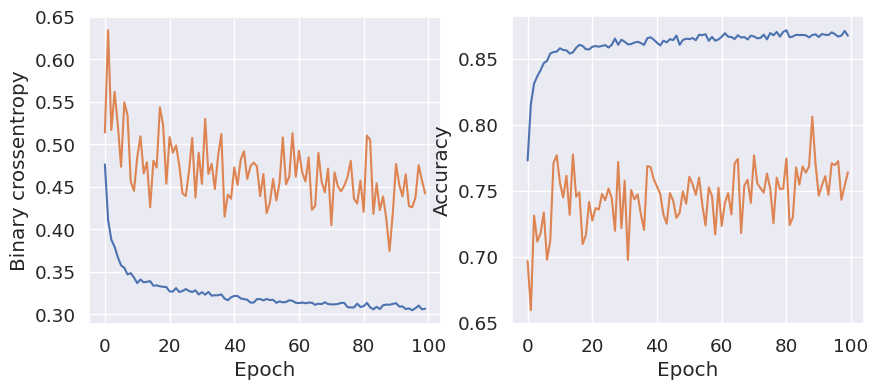

119/119 [==============================] - 0s 1ms/step - loss: 0.2932 - accuracy: 0.8757
32 nodes, dropout 0.2, lr 0.001, batch size 32


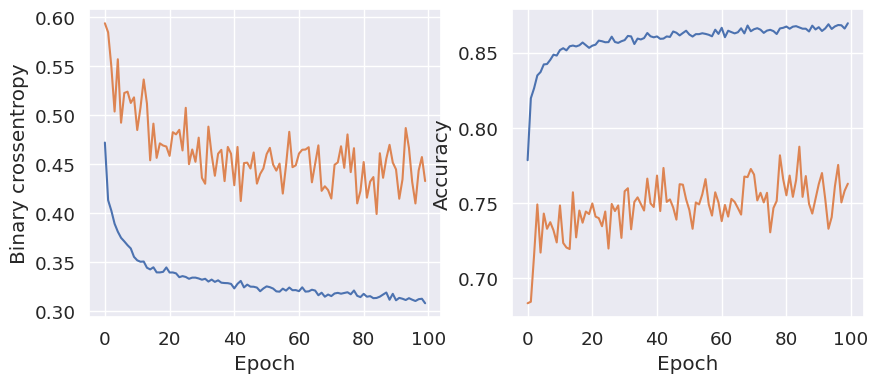

119/119 [==============================] - 0s 2ms/step - loss: 0.2988 - accuracy: 0.8762
32 nodes, dropout 0.2, lr 0.001, batch size 64


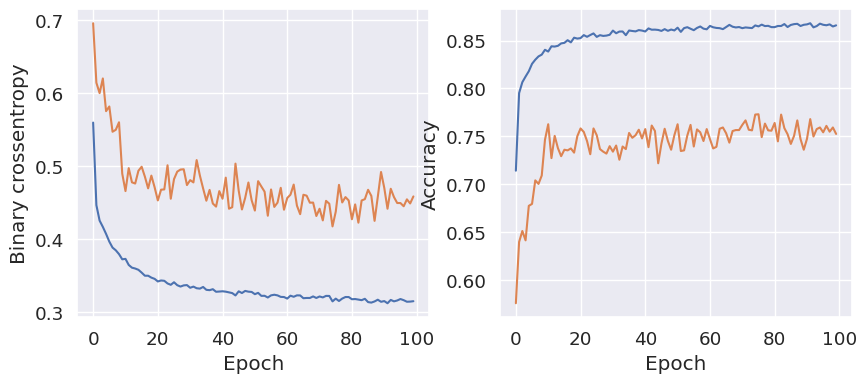

119/119 [==============================] - 0s 2ms/step - loss: 0.2963 - accuracy: 0.8717
32 nodes, dropout 0.2, lr 0.001, batch size 128


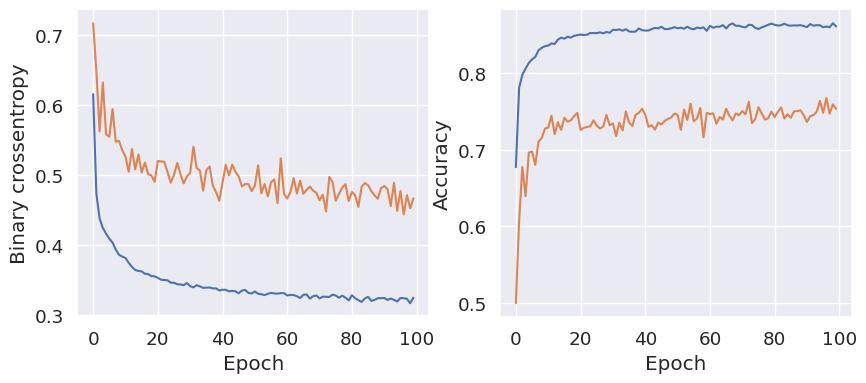

119/119 [==============================] - 0s 1ms/step - loss: 0.3003 - accuracy: 0.8728
64 nodes, dropout 0, lr 0.01, batch size 32


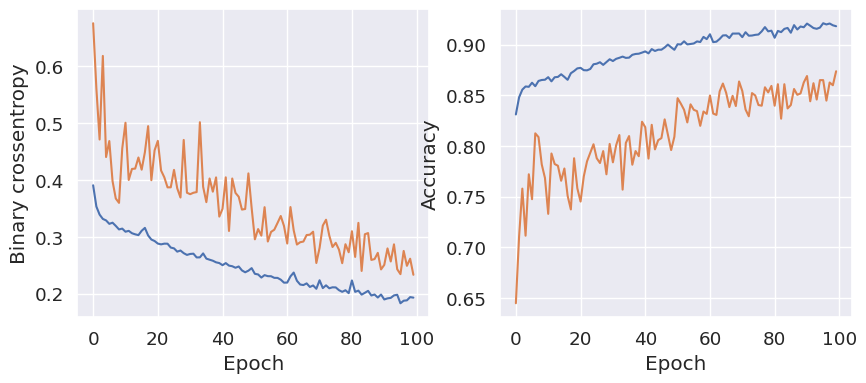

119/119 [==============================] - 0s 1ms/step - loss: 0.5453 - accuracy: 0.8583
64 nodes, dropout 0, lr 0.01, batch size 64


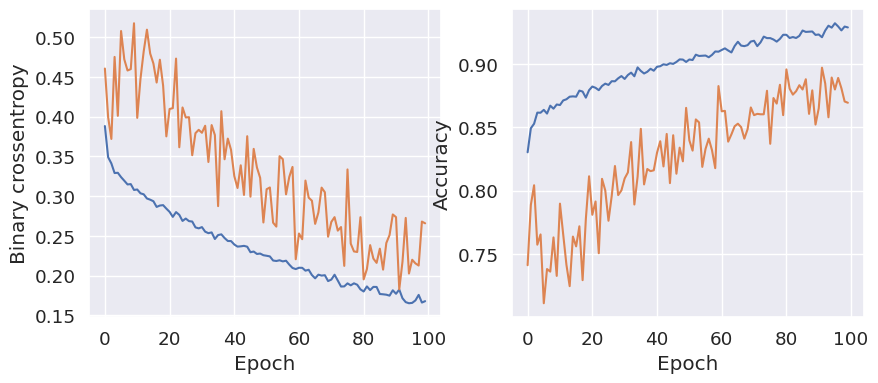

119/119 [==============================] - 0s 1ms/step - loss: 0.6248 - accuracy: 0.8544
64 nodes, dropout 0, lr 0.01, batch size 128


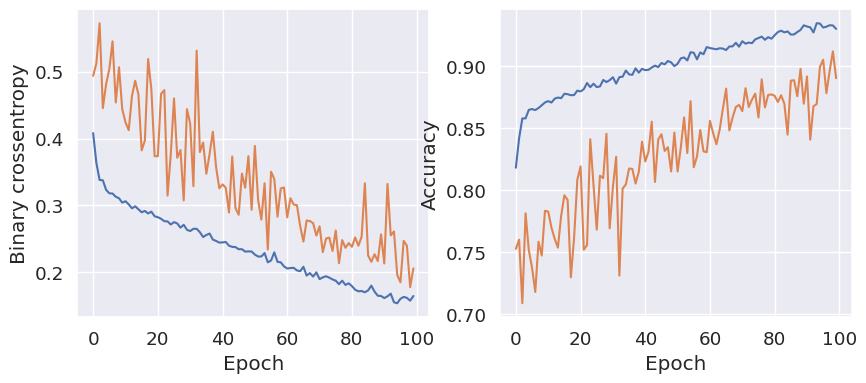

119/119 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.8570
64 nodes, dropout 0, lr 0.005, batch size 32


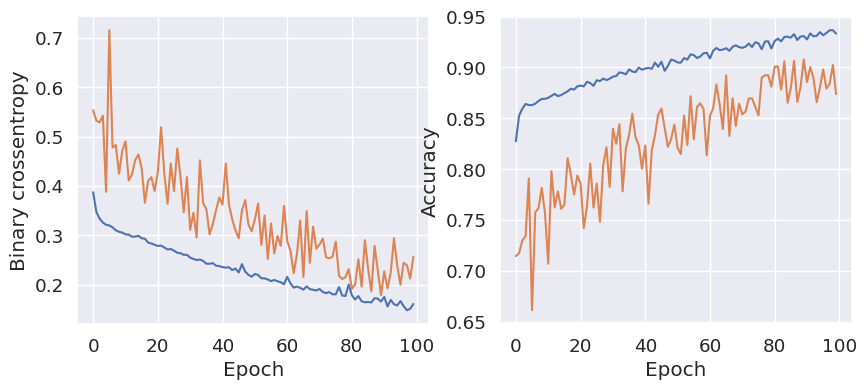

119/119 [==============================] - 0s 1ms/step - loss: 0.6054 - accuracy: 0.8528
64 nodes, dropout 0, lr 0.005, batch size 64


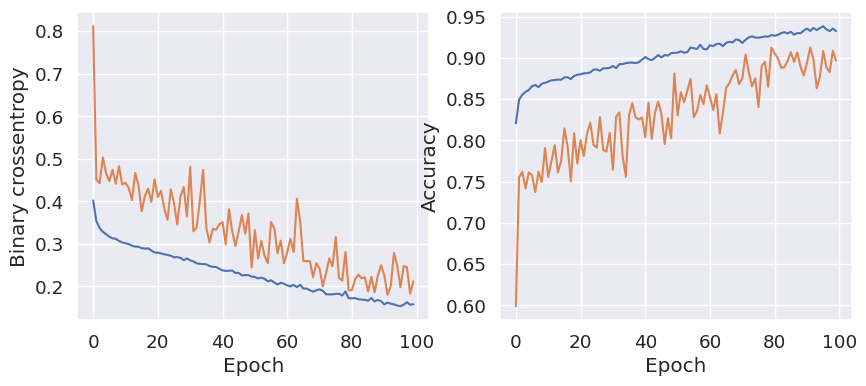

119/119 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.8591
64 nodes, dropout 0, lr 0.005, batch size 128


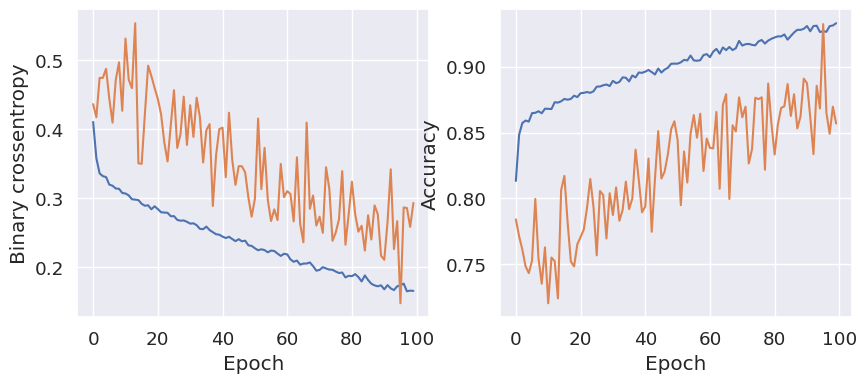

119/119 [==============================] - 0s 1ms/step - loss: 0.4909 - accuracy: 0.8662
64 nodes, dropout 0, lr 0.001, batch size 32


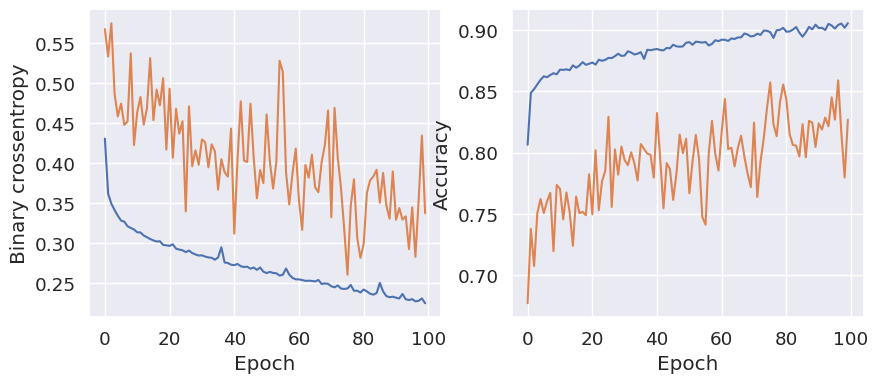

119/119 [==============================] - 0s 1ms/step - loss: 0.3261 - accuracy: 0.8704
64 nodes, dropout 0, lr 0.001, batch size 64


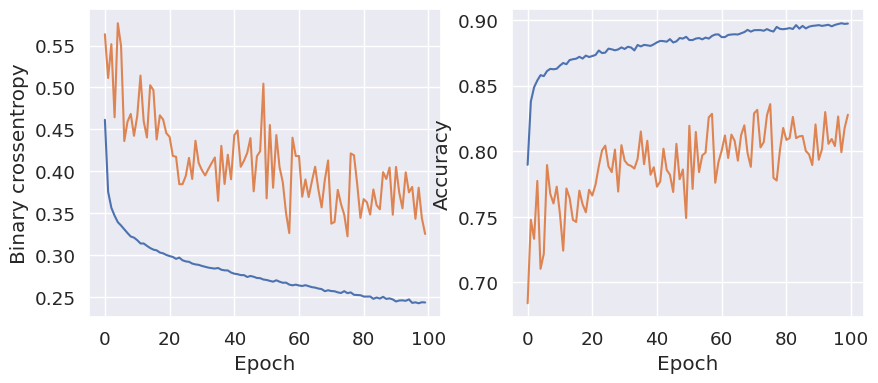

119/119 [==============================] - 0s 1ms/step - loss: 0.3188 - accuracy: 0.8741
64 nodes, dropout 0, lr 0.001, batch size 128


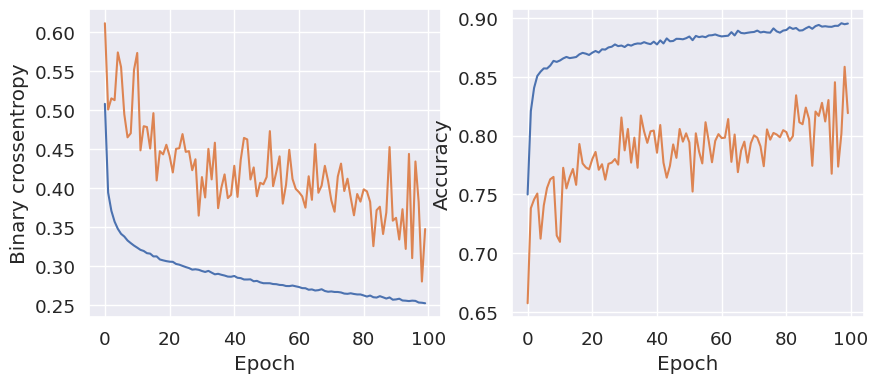

119/119 [==============================] - 0s 1ms/step - loss: 0.3097 - accuracy: 0.8738
64 nodes, dropout 0.2, lr 0.01, batch size 32


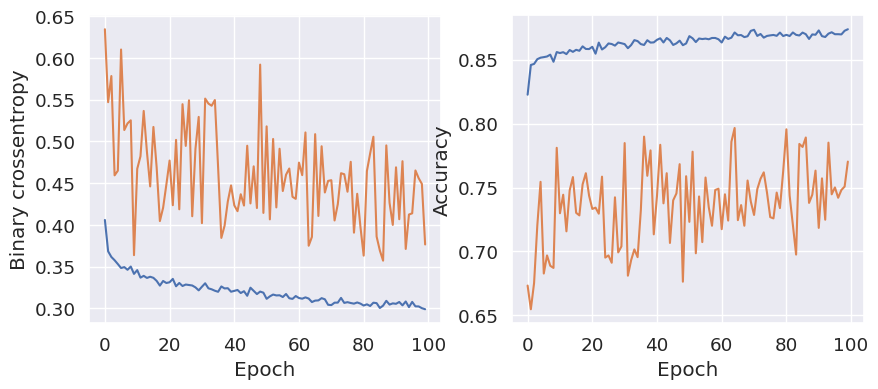

119/119 [==============================] - 0s 1ms/step - loss: 0.3193 - accuracy: 0.8759
64 nodes, dropout 0.2, lr 0.01, batch size 64


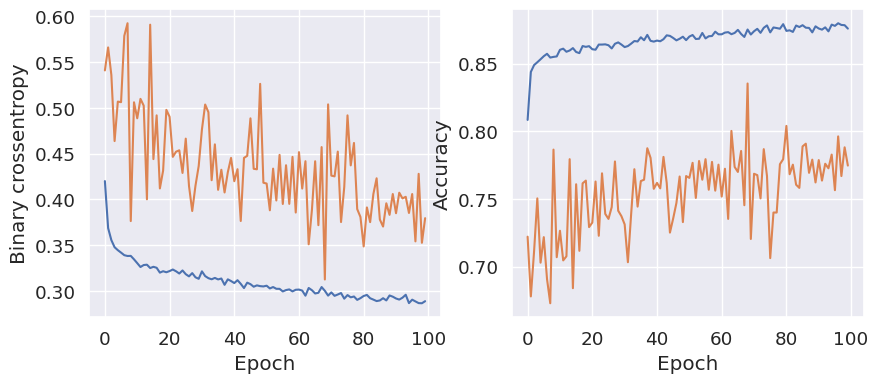

119/119 [==============================] - 0s 1ms/step - loss: 0.3035 - accuracy: 0.8754
64 nodes, dropout 0.2, lr 0.01, batch size 128


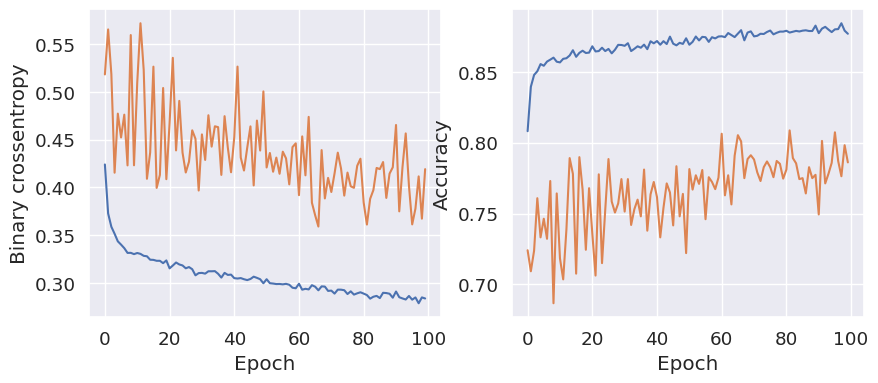

119/119 [==============================] - 0s 1ms/step - loss: 0.3085 - accuracy: 0.8762
64 nodes, dropout 0.2, lr 0.005, batch size 32


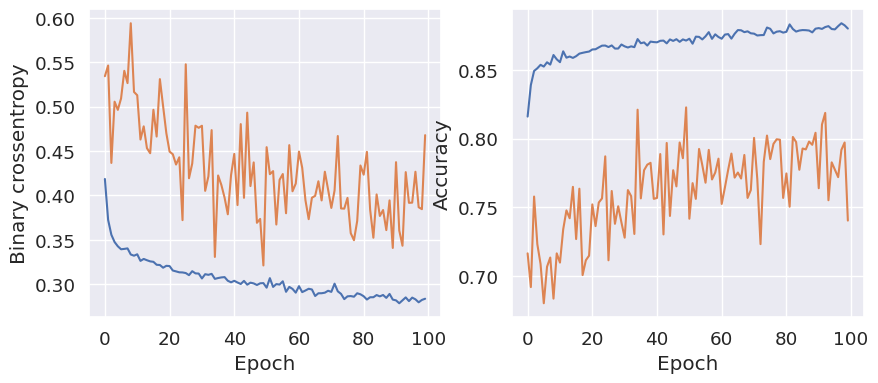

119/119 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8709
64 nodes, dropout 0.2, lr 0.005, batch size 64


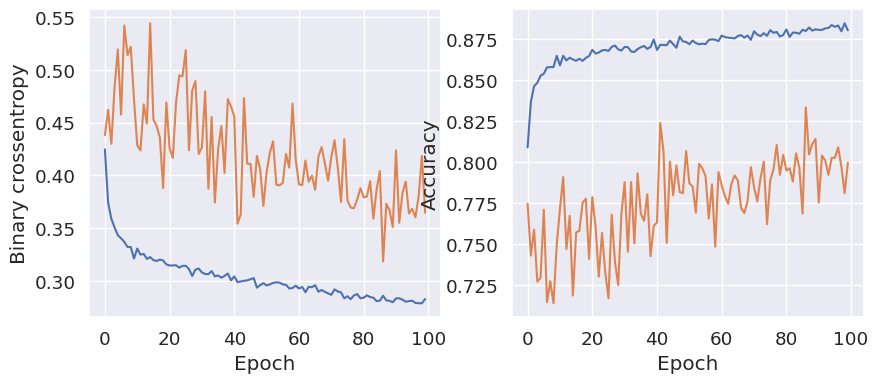

119/119 [==============================] - 0s 1ms/step - loss: 0.2989 - accuracy: 0.8788
64 nodes, dropout 0.2, lr 0.005, batch size 128


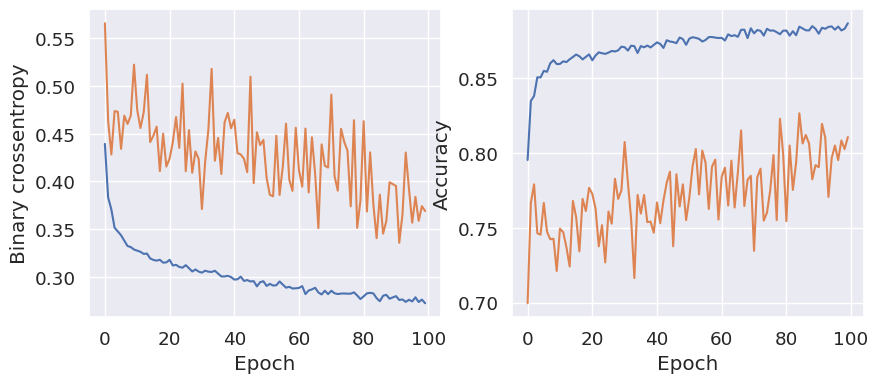

119/119 [==============================] - 0s 1ms/step - loss: 0.3037 - accuracy: 0.8814
64 nodes, dropout 0.2, lr 0.001, batch size 32


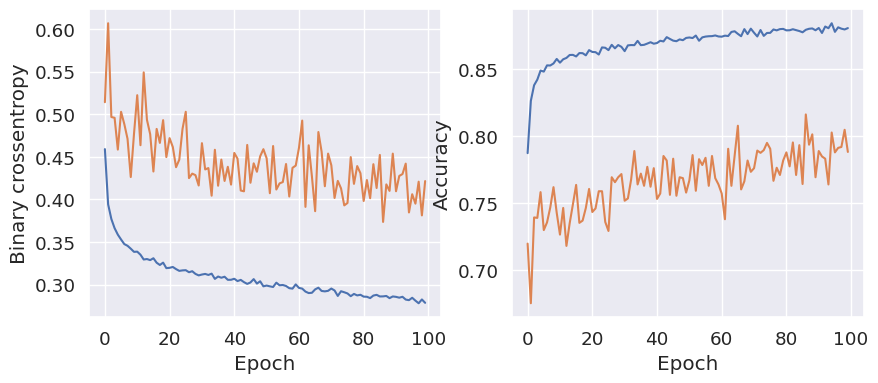

119/119 [==============================] - 0s 1ms/step - loss: 0.2998 - accuracy: 0.8775
64 nodes, dropout 0.2, lr 0.001, batch size 64


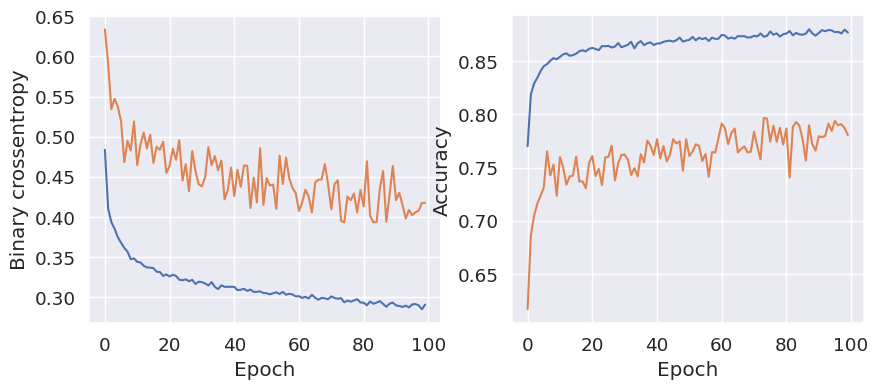

119/119 [==============================] - 0s 1ms/step - loss: 0.2949 - accuracy: 0.8812
64 nodes, dropout 0.2, lr 0.001, batch size 128


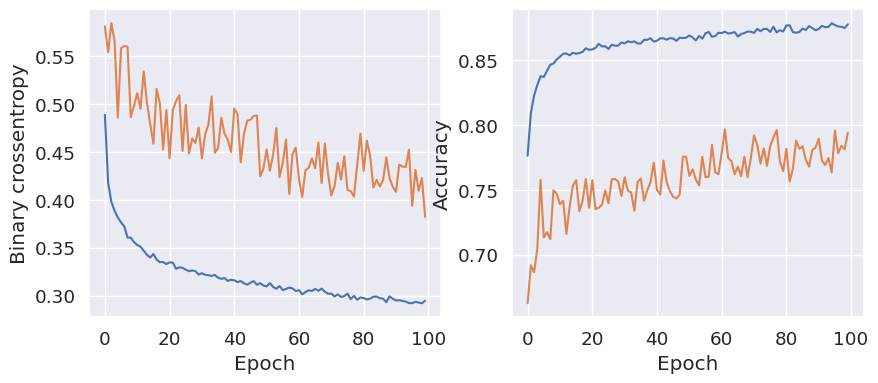

119/119 [==============================] - 0s 1ms/step - loss: 0.2930 - accuracy: 0.8775


In [70]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [71]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 925us/step


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1322
           1       0.88      0.94      0.91      2482

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804

